In [58]:
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load & cleaning data

In [59]:
DATA_ROOT = Path("FPT")
filename = "[CPC.ml] Data Converted with Code.csv"

base_df = pd.read_csv(str(DATA_ROOT/filename))
NG_df = base_df[base_df["Total Judge"]=="NG"]
NG_df = NG_df[NG_df["CODE"]!= 0]
# drop unecessary cols
NG_df.drop(columns=NG_df.columns[:10], inplace=True)

# get indexes of records contain "OK"
indexes_with_OK = NG_df[NG_df.isin(['OK']).any(axis=1)].index
output_path = "indexes_with_OK.txt"
with open(output_path, 'w') as f:
    for index in indexes_with_OK:
        f.write(f"{index}\n")

NG_df = NG_df[~NG_df.isin(['OK']).any(axis=1)]
print(f"Data length: {NG_df.__len__()}")

Data length: 2049


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2828\494456996.py:4: DtypeWarning: Columns (36,40,60,61,62,64,65,66,67,68,69,70,73,75,76) have mixed types. Specify dtype option on import or set low_memory=False.
  base_df = pd.read_csv(str(DATA_ROOT/filename))


## Getting suitable for dtype for processing

In [60]:
NG_df = NG_df.astype("float64")
NG_df.CODE = NG_df.CODE.astype(int)
NG_df = NG_df.fillna(NG_df.mean())
NG_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2049 entries, 2 to 25383
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Character_03   2049 non-null   float64
 1   Character_05   2049 non-null   float64
 2   Character_07   2049 non-null   float64
 3   Character_09   2049 non-null   float64
 4   Character_12   2049 non-null   float64
 5   Character_13   2049 non-null   float64
 6   Character_15   2049 non-null   float64
 7   Character_16   2049 non-null   float64
 8   Character_20   2049 non-null   float64
 9   Character_22   2049 non-null   float64
 10  Character_26   2049 non-null   float64
 11  Character_28   2049 non-null   float64
 12  Character_32   2049 non-null   float64
 13  Character_34   2049 non-null   float64
 14  Character_38   2049 non-null   float64
 15  Character_40   2049 non-null   float64
 16  Character_42   2049 non-null   float64
 17  Character_44   2049 non-null   float64
 18  Character_46

## Checkpoint

In [61]:
NG_df.to_csv("Selected.csv")

## Distribution

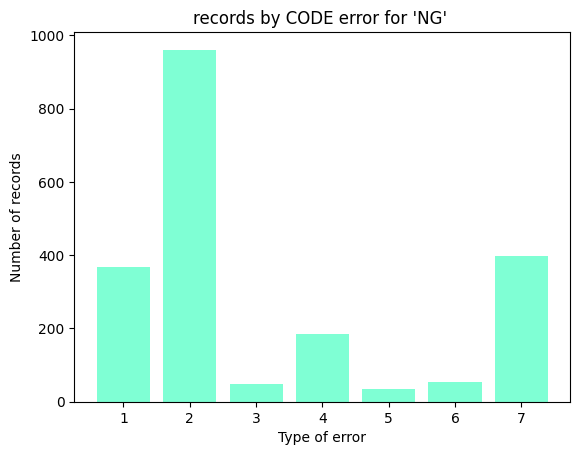

In [62]:
xlabel = NG_df.CODE.value_counts().to_dict().keys()
ylabel = NG_df.CODE.value_counts().to_dict().values()

plt.bar(xlabel, ylabel, color="aquamarine")
plt.title("records by CODE error for 'NG' ")
plt.xlabel("Type of error")
plt.ylabel("Number of records")
plt.show()

### **Remark**: The data is imbalanced for class `1`, `2` and `7`

In [63]:
y = NG_df.CODE
X = NG_df[NG_df.columns].drop(columns="CODE")

print(f" Number of features: {X.columns.__len__()}")

 Number of features: 71


## PREPROCESSING

1. **Standardize**
2. **PCA** <br>
`principal component: 80%` 

Train size: 2049


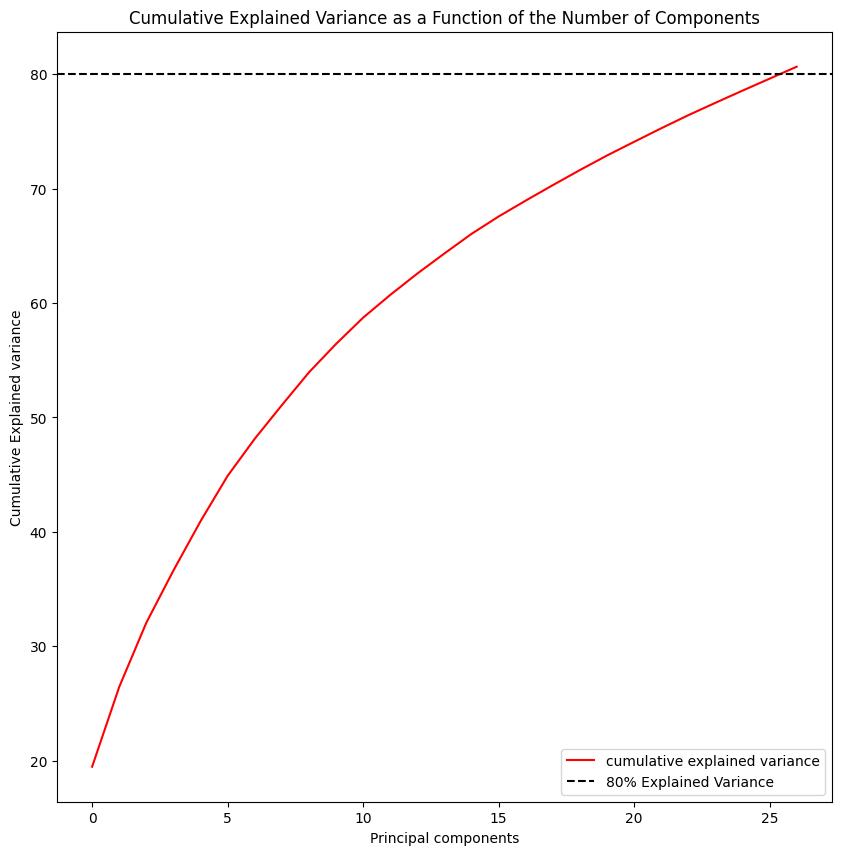

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

SEED = 15
# X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.15, random_state=SEED)
print(f"Train size: {len(X)}")
# print(f"Test size: {len(X_test)}")

def preprocessing(X):
    """preproccess layers, apply standardize and pca to X_train and X_test"""
    # standard scaler
    scaler = StandardScaler()
    scaler.fit(X)
    X_scaled = scaler.transform(X)
    
    thresh = 80 
    if thresh < 0 or thresh > 100:
        raise ValueError("Thresh must between 0 and 100")
    
    # pca
    pca = PCA(float(f".{thresh}"))
    pca.fit(X_scaled)
    preprocessed_X = pca.transform(X_scaled)
    
    cumsum = np.cumsum(pca.explained_variance_ratio_)*100
    d = [n for n in range(len(cumsum))]
    plt.figure(figsize=(10, 10))
    plt.plot(d,cumsum, color = 'red',label='cumulative explained variance')
    plt.title('Cumulative Explained Variance as a Function of the Number of Components')
    plt.ylabel('Cumulative Explained variance')
    plt.xlabel('Principal components')
    plt.axhline(y = thresh, color='k', linestyle='--', label = f'{thresh}% Explained Variance')
    plt.legend(loc='best')
    
    return preprocessed_X

X = preprocessing(X)

In [ ]:
# from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, f1_score

# def evaluate(model, X_test, y_test, average: None) -> dict:
#         y_pred = model.predict(X_test)
#         if average is None:
#             average = 'weighted'
#         cm = confusion_matrix(y_test, y_pred)
#         accuracy = accuracy_score(y_test, y_pred)
#         precision = precision_score(y_test, y_pred, average=average, zero_division=0)
#         recall = recall_score(y_test, y_pred, average=average, zero_division=0)
#         f1 = f1_score(y_test, y_pred, average=average, zero_division=0)
        
#         return {
#             'confusion_matrix': cm,
#             'accuracy': round(accuracy, 2),
#             'precision': round(precision, 2),
#             'recall': round(recall, 2),
#             'f1': round(f1, 2)
#         }

In [66]:
num_class = 7

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

kmeans = KMeans(n_clusters=num_class, random_state=SEED, n_init='auto', verbose=1)
kmeans.fit(X)

Initialization complete
Iteration 0, inertia 104546.53648717477.
Iteration 1, inertia 77923.60129158686.
Iteration 2, inertia 74796.1780503249.
Iteration 3, inertia 73705.67254001519.
Iteration 4, inertia 73278.00809518136.
Iteration 5, inertia 73035.360528274.
Iteration 6, inertia 72840.21449869042.
Iteration 7, inertia 72777.12517859123.
Iteration 8, inertia 72751.32916014633.
Iteration 9, inertia 72742.58004329001.
Iteration 10, inertia 72741.1037093929.
Iteration 11, inertia 72740.57016597994.
Converged at iteration 11: center shift 0.00014851801443043378 within tolerance 0.0002121122802520485.


KMeans(n_clusters=7, random_state=15, verbose=1)

In [68]:
agg = AgglomerativeClustering(n_clusters=num_class)
agg.fit(X)

AgglomerativeClustering(n_clusters=7)

In [ ]:
gm = GaussianMixture(n_components=num_class, random_state=SEED, verbose=1)
gm.fit(X)

Initialization 0
Initialization converged.


GaussianMixture(n_components=7, random_state=15, verbose=1)

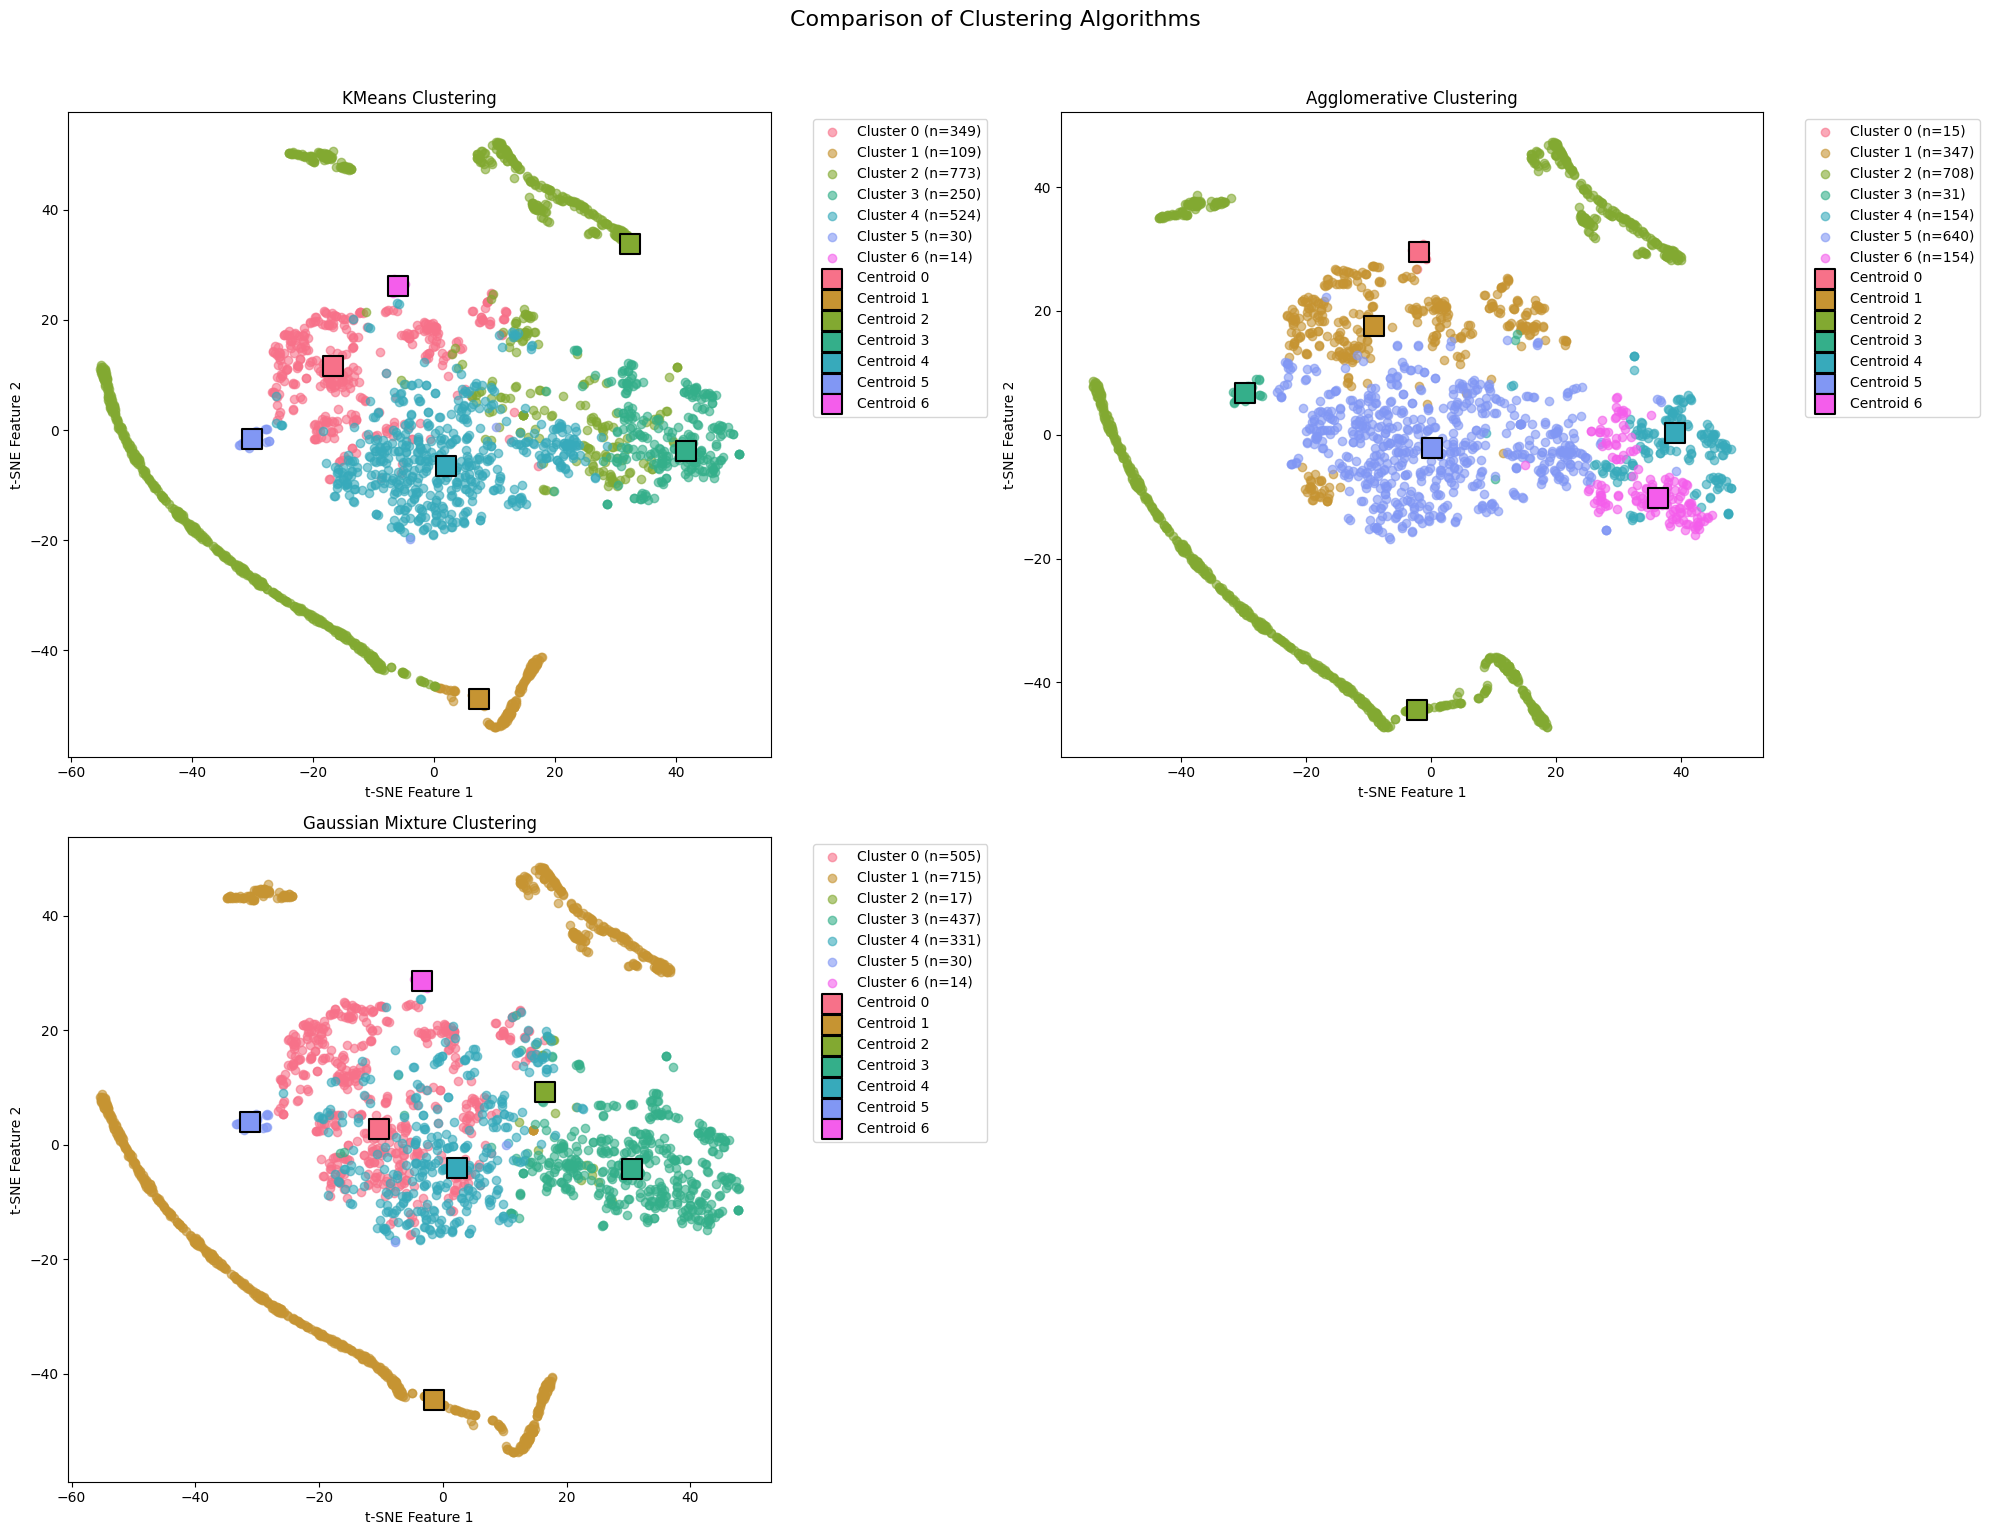

In [ ]:
from sklearn.manifold import TSNE

def visualize_clusters(X, labels, title, ax, model=None, random_state=42):
    """
    Visualize clustering results using t-SNE dimensionality reduction.
    
    Parameters:
    -----------
    X : array-like of shape (n_samples, n_features)
        The input data
    labels : array-like of shape (n_samples,)
        The cluster labels
    title : str
        Title for the plot
    ax : matplotlib axes
        The axes to plot on
    model : sklearn clustering model, optional
        The fitted clustering model (needed for centroids)
    random_state : int, optional (default=42)
        Random state for t-SNE
    """
    if model is not None:
        if hasattr(model, 'cluster_centers_'):  
            centroids = model.cluster_centers_
        elif hasattr(model, 'means_'):  
            centroids = model.means_
        elif title == 'Agglomerative':  
            centroids = np.array([X[labels == i].mean(axis=0) for i in range(len(np.unique(labels)))])
        else:
            centroids = None
    else:
        centroids = None

    if centroids is not None:
        X_combined = np.vstack([X, centroids])
    else:
        X_combined = X

    tsne = TSNE(n_components=2, random_state=random_state)
    tsne_combined = tsne.fit_transform(X_combined)
    
    if centroids is not None:
        tsne_result = tsne_combined[:-len(centroids)]
        centroids_tsne = tsne_combined[-len(centroids):]
    else:
        tsne_result = tsne_combined
        centroids_tsne = None
    
    n_clusters = len(np.unique(labels))
    
    colors = sns.color_palette("husl", n_clusters)
    
    unique, counts = np.unique(labels, return_counts=True)
    cluster_sizes = dict(zip(unique, counts))
    
    for i in range(n_clusters):
        mask = labels == i
        ax.scatter(tsne_result[mask, 0], tsne_result[mask, 1], 
                  c=[colors[i]], 
                  label=f'Cluster {i} (n={cluster_sizes[i]})',
                  alpha=0.6)
    
    if centroids_tsne is not None:
        for i in range(n_clusters):
            ax.scatter(centroids_tsne[i, 0], centroids_tsne[i, 1],
                      c=[colors[i]], marker='s', s=200, 
                      edgecolor='black', linewidth=1.5,
                      label=f'Centroid {i}')
    
    ax.set_title(f'{title} Clustering', fontsize=12)
    ax.set_xlabel('t-SNE Feature 1')
    ax.set_ylabel('t-SNE Feature 2')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    
    return tsne_result

fig, axes = plt.subplots(2, 2, figsize=(20, 15))
axes = axes.ravel()

clustering_data = [
    (kmeans, kmeans.labels_, 'KMeans'),
    (agg, agg.labels_, 'Agglomerative'),
    (gm, gm.predict(X), 'Gaussian Mixture')
]

for idx, (model, labels, name) in enumerate(clustering_data):
    tsne_result = visualize_clusters(X, labels, name, axes[idx], model)

axes[3].remove()
fig.suptitle('Comparison of Clustering Algorithms', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# Metrics
- `Adjusted Rand Index (ARI)` [-0.5~1]: The ARI measures the similarity between the true labels and the labels predicted by the algorithm. The ARI value ranges from -0.5 to 1, where 1 indicates perfect match.
- `Normalized Mutual Information (NMI)` [0-1]: NMI measures the amount of information shared between the predicted clusters and the true labels. The NMI value ranges from 0 to 1, with 1 being perfect.
- `Homogeneity` [0-1]: A model is considered homogeneous if all points in a cluster have the same label.
- `Completeness` [0-1]: A model is considered complete if all points with the same label are grouped into the same cluster.
- `V-Measure` [0-1]: The harmonic mean of homogeneity and completeness.
- `Adjusted Mutual Information (AMI)` [0-1]: Similar to NMI but adjusted for chance to eliminate the effect of random clustering.


In [88]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, homogeneity_completeness_v_measure, adjusted_mutual_info_score

def eval_cluster(y_true, y_pred):
    ari = adjusted_rand_score(y_true, y_pred)
    nmi = normalized_mutual_info_score(y_true, y_pred)
    h, c, v = homogeneity_completeness_v_measure(y_true, y_pred)
    ami = adjusted_mutual_info_score(y_true, y_pred)

    return {
        "ARI": round(ari,3 ),
        "NMI": round(nmi,3 ),
        "Homogeneity":round(h,3 ),
        "Completeness":round(c,3 ),
        "V-Measure":round(v,3 ),
        "AMI":round(ami,3 ),
    }

y_pred_kmns = kmeans.predict(X)
y_pred_agg = agg.labels_
y_pred_gm = gm.predict(X)
kms_eval_values = eval_cluster(y, y_pred_kmns)
agg_eval_values = eval_cluster(y, y_pred_agg)
gm_eval_values = eval_cluster(y, y_pred_gm)

metrics_df = pd.DataFrame({
    "Kmeans":kms_eval_values,
    "Agglomerative":agg_eval_values,
    "Gaussian Mixture":gm_eval_values,
}).T

metrics_df

,ARI,NMI,Homogeneity,Completeness,V-Measure,AMI
Kmeans,0.032,0.072,0.073,0.070,0.072,0.066
Agglomerative,0.046,0.079,0.081,0.078,0.079,0.074
Gaussian Mixture,0.019,0.052,0.053,0.052,0.052,0.046


# Results

- Model arhieve a `visually good clustering` performance while the `metrics show poor results`
    >Reason: **t-SNE** is a dimensionality reduction technique primarily used for visualizing data in 2D or 3D space. It tries to preserve the local structure of the data, making it easier to observe the clustering, but it doesn't always accurately reflect the clustering quality. On the other hand, metrics like **ARI**, **NMI**, and **AMI** evaluate the similarity between predicted clusters and true labels, which may not align with the visual structure shown by t-SNE.

# Conclusion:
- The dataset `does have a good clustering pattern`.